In [33]:
import pandas as pd

In [34]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/covid_19_indonesia_time_series_all.csv')
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [35]:
df.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [37]:
df.shape

(31822, 38)

In [38]:
# Konversi 'Case Fatality Rate' dan 'Case Recovered Rate' ke float
df['Case Fatality Rate'] = df['Case Fatality Rate'].str.replace('%', '').astype(float) / 100
df['Case Recovered Rate'] = df['Case Recovered Rate'].str.replace('%', '').astype(float) / 100

In [39]:
# Kolom yang akan dihapus
columns_to_drop = [
    'City or Regency', 'Island', 'Time Zone', 'Special Status',
    'Total Regencies', 'Total Cities', 'Total Districts',
    'Total Urban Villages', 'Total Rural Villages',
    'Location ISO Code', 'Country', 'Continent',
    'New Cases per Million', 'Total Cases per Million',
    'New Deaths per Million', 'Total Deaths per Million', 'Total Deaths per 100rb'
]

# Hapus kolom dari dataset
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Tampilkan informasi dataset setelah penghapusan kolom
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location                     31822 non-null  object 
 2   New Cases                    31822 non-null  int64  
 3   New Deaths                   31822 non-null  int64  
 4   New Recovered                31822 non-null  int64  
 5   New Active Cases             31822 non-null  int64  
 6   Total Cases                  31822 non-null  int64  
 7   Total Deaths                 31822 non-null  int64  
 8   Total Recovered              31822 non-null  int64  
 9   Total Active Cases           31822 non-null  int64  
 10  Location Level               31822 non-null  object 
 11  Province                     30893 non-null  object 
 12  Area (km2)                   31822 non-null  int64  
 13  Population      

# Analisis Deskripsi

In [40]:
# filter data untuk indonesia
indonesia_data = df[df['Location'] == 'Indonesia']

# Konversi kolom 'Date' menjadi format datetime
indonesia_data['Date'] = pd.to_datetime(indonesia_data['Date'])

# Analisis Deskripsi
print("Analisis Deskripsi:")
print(indonesia_data[['New Cases', 'New Deaths', 'New Recovered']].describe())




Analisis Deskripsi:
          New Cases   New Deaths  New Recovered
count    929.000000   929.000000     929.000000
mean    6894.557589   169.941873    6693.980624
std    11016.594267   313.107594   10144.787016
min        0.000000     0.000000       0.000000
25%      719.000000    17.000000     627.000000
50%     3535.000000    78.000000    3617.000000
75%     6388.000000   172.000000    6792.000000
max    64718.000000  2069.000000   61361.000000


<ipython-input-40-67cf2b361381>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indonesia_data['Date'] = pd.to_datetime(indonesia_data['Date'])


# Bagaimana tren Pertumbuhan Kasus baru,Kematian, dan  kesembuhan COVID-19 di Indonesia


Total Kasus: 6405044
Total Kematian: 157876
Total Kesembuhan: 6218708


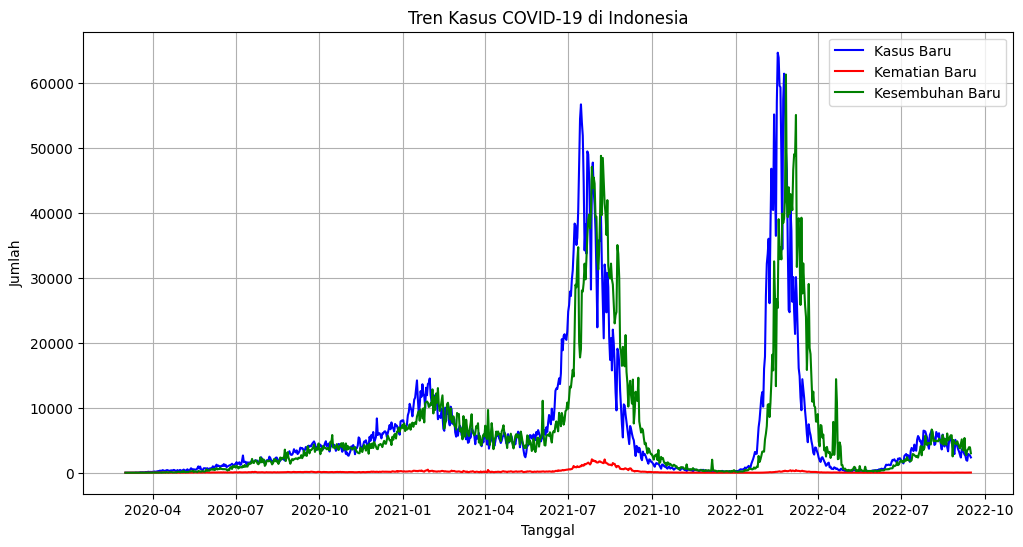

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total kasus, kematian, dan kesembuhan
total_cases = indonesia_data['Total Cases'].iloc[-1]
total_deaths = indonesia_data['Total Deaths'].iloc[-1]
total_recovered = indonesia_data['Total Recovered'].iloc[-1]

print(f"\nTotal Kasus: {total_cases}")
print(f"Total Kematian: {total_deaths}")
print(f"Total Kesembuhan: {total_recovered}")

# Visualisasi Tren Kasus Baru
plt.figure(figsize=(12, 6))
plt.plot(indonesia_data['Date'], indonesia_data['New Cases'], label='Kasus Baru', color='blue')
plt.plot(indonesia_data['Date'], indonesia_data['New Deaths'], label='Kematian Baru', color='red')
plt.plot(indonesia_data['Date'], indonesia_data['New Recovered'], label='Kesembuhan Baru', color='green')
plt.title('Tren Kasus COVID-19 di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah')
plt.legend()
plt.grid()
plt.show()

## KESIMPULAN



1.   Lonjakan Kasus yang Signifikan

Terdapat dua puncak utama dalam jumlah Kasus Baru di Indonesia, yaitu sekitar awal tahun 2021 dan pertengahan tahun 2022. Lonjakan ini kemungkinan disebabkan oleh gelombang varian virus baru atau pelonggaran kebijakan pembatasan.

2.  Stabilitas di Akhir Periode

Di akhir periode (2022), baik jumlah Kasus Baru, Kematian Baru, maupun Kesembuhan Baru menunjukkan penurunan, mengindikasikan bahwa situasi pandemi mulai terkendali.


<ipython-input-20-95f18fdfb9a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indonesia_data['Case Fatality Rate'] = (indonesia_data['Total Deaths'] / indonesia_data['Total Cases']) * 100
<ipython-input-20-95f18fdfb9a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indonesia_data['Case Recovered Rate'] = (indonesia_data['Total Recovered'] / indonesia_data['Total Cases']) * 100


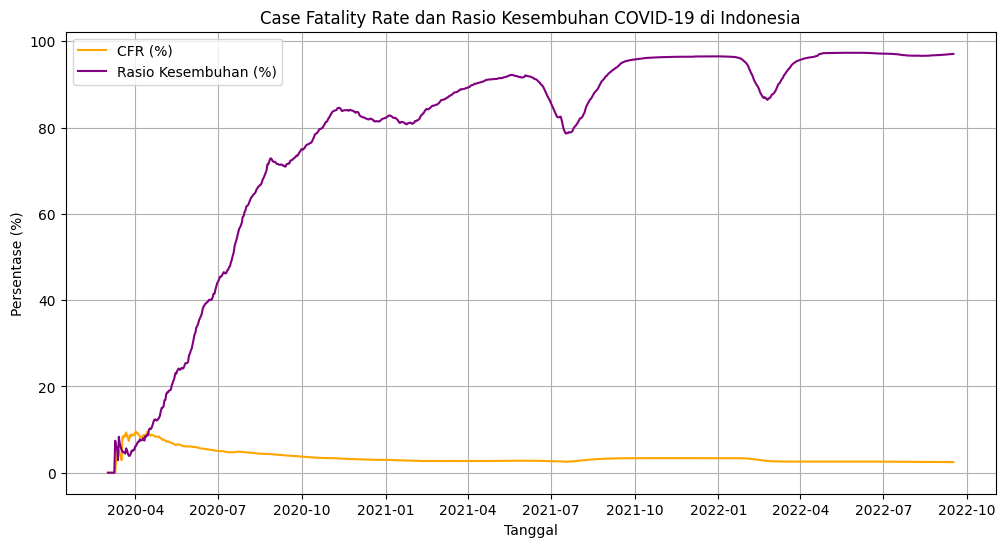

In [20]:
# Analisis CFR dan Rasio Kesembuhan
indonesia_data['Case Fatality Rate'] = (indonesia_data['Total Deaths'] / indonesia_data['Total Cases']) * 100
indonesia_data['Case Recovered Rate'] = (indonesia_data['Total Recovered'] / indonesia_data['Total Cases']) * 100

# Visualisasi CFR dan Rasio Kesembuhan
plt.figure(figsize=(12, 6))
plt.plot(indonesia_data['Date'], indonesia_data['Case Fatality Rate'], label='CFR (%)', color='orange')
plt.plot(indonesia_data['Date'], indonesia_data['Case Recovered Rate'], label='Rasio Kesembuhan (%)', color='purple')
plt.title('Case Fatality Rate dan Rasio Kesembuhan COVID-19 di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Persentase (%)')
plt.legend()
plt.grid()
plt.show()


# Provinsi mana yang memliki tingkat kasus yang tinggi?

<ipython-input-22-e1dc3d2334f4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=province_data.index, x=province_data['Total Cases'], palette='coolwarm')


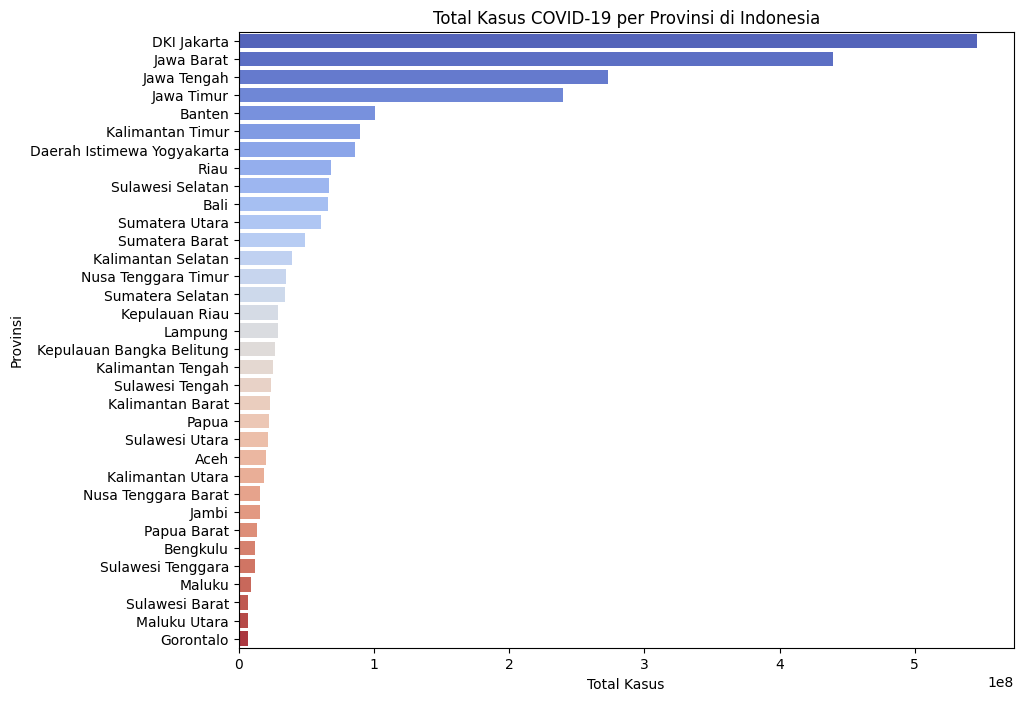

In [22]:
# Analisis Per Provinsi
province_data = df.groupby('Province').sum()[['Total Cases', 'Total Deaths', 'Total Recovered']]
province_data = province_data.sort_values(by='Total Cases', ascending=False)

# Visualisasi Total Kasus per Provinsi
plt.figure(figsize=(10, 8))
sns.barplot(y=province_data.index, x=province_data['Total Cases'], palette='coolwarm')
plt.title('Total Kasus COVID-19 per Provinsi di Indonesia')
plt.xlabel('Total Kasus')
plt.ylabel('Provinsi')
plt.show()

Provinsi dengan Total Kasus Tertinggi adalah DKI Jakarta, memiliki total kasus COVID-19 tertinggi dibandingkan provinsi lain, diikuti oleh Jawa Barat, Jawa Tengah, dan Jawa Timur.

Provinsi di Pulau Jawa mendominasi jumlah total kasus, kemungkinan besar karena tingginya kepadatan penduduk dan mobilitas yang tinggi di daerah tersebut.

# Apakah terdapat hubungan antara kepadatan penduduk dengan jumlah total kasus COVID-19?

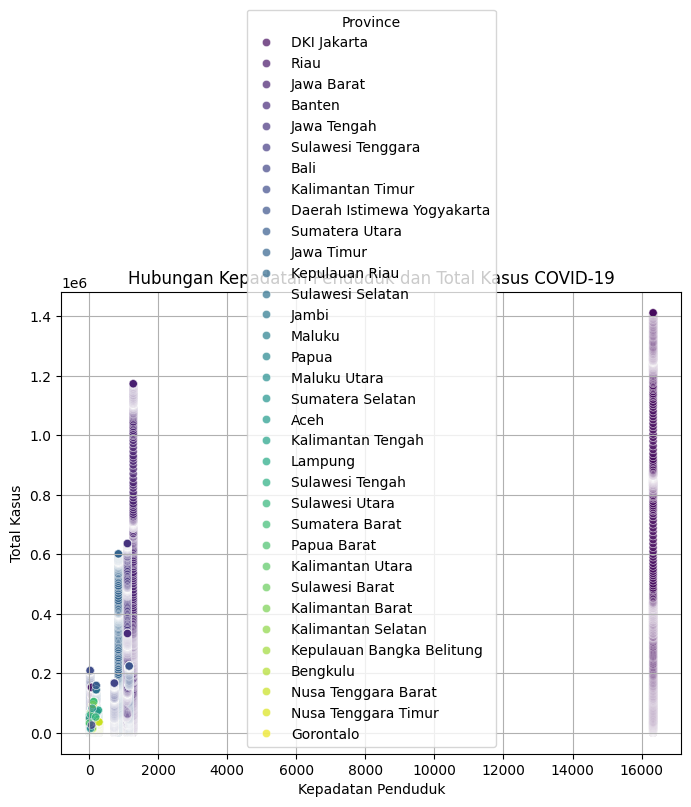

In [25]:
# Analisis Hubungan Kepadatan Penduduk dengan Kasus
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Population Density', y='Total Cases', hue='Province', palette='viridis', alpha=0.7)
plt.title('Hubungan Kepadatan Penduduk dan Total Kasus COVID-19')
plt.xlabel('Kepadatan Penduduk')
plt.ylabel('Total Kasus')
plt.grid()
plt.show()

## Kesimpulan

DKI Jakarta sebagai pusat aktivitas ekonomi dan mobilitas tinggi menjadi provinsi dengan total kasus tertinggi, sementara provinsi di kawasan timur Indonesia memiliki jumlah kasus lebih rendah. Data ini menunjukkan adanya kemungkinan korelasi antara jumlah total kasus dengan kepadatan penduduk dan tingkat mobilitas.